In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import wave #for saving the audio file
%matplotlib inline

In [29]:
p = pyaudio.PyAudio() # instantiate PyAudio
chunck = 1024 # number of samples per frame

In [30]:
# open stream
stream = p.open(format=pyaudio.paInt16,channels=1, rate=10000, input=True, frames_per_buffer=chunck)

In [31]:
data2 = np.array([]) # to store the data
for i in range(1,50):
    a = stream.read(chunck) # read a chunck of data
    data = np.fromstring(a, dtype=np.int16) # convert data to numpy array
    data2 = np.append(data2, data) # append data to data2


#to stop the recording after the amount of time we calculated in our code
stream.stop_stream() # stop stream(Recording)
stream.close() # close stream
p.terminate() # close PyAudio

<ipython-input-31-62c255281272>:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(a, dtype=np.int16) # convert data to numpy array


In [32]:
print(data)

[ 7 12 13 ...  2  1  0]


In [33]:
print(data2)

[ 0.  0. -1. ...  2.  1.  0.]


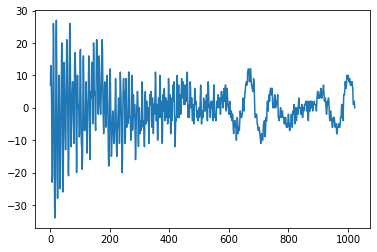

In [34]:
plt.close()
plt.plot(data)
plt.show()

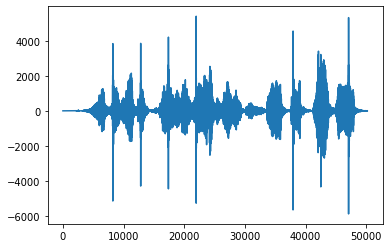

In [35]:
plt.close()
plt.plot(data2)
plt.show()

In [36]:
#to stop the recording after the amount of time we calculated in our code
stream.stop_stream() # stop stream(Recording)
stream.close() # close stream
p.terminate() # close PyAudio

In [37]:
#to play the recorded sound
p2 = pyaudio.PyAudio() # instantiate PyAudio
out = p2.open(format=pyaudio.paInt16,channels=1, rate=10000, output=True, frames_per_buffer=chunck)

In [38]:
data_out = np.chararray.tostring(data2.astype(np.int16)) # convert data to string(needed for playing sound in order to turn the data to sound)

<ipython-input-38-90c6e4e4c0f8>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16)) # convert data to string(needed for playing sound in order to turn the data to sound)


In [39]:
# play. May repeat with different volume values (if done interactively)
out.write(data_out)

In [14]:
#deleting the first of our sound till 15000
data2 = data2[15000:]

data_out = np.chararray.tostring(data2.astype(np.int16))
out.write(data_out)

<ipython-input-14-d7346bd5461d>:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16))


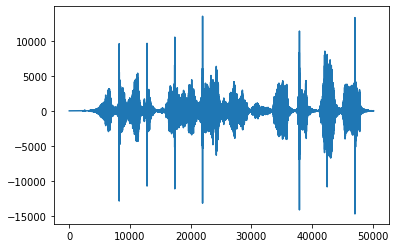

In [40]:
data2 = data2*2.5 # increase the volume of the sound
plt.close()
plt.plot(data2)
plt.show()

In [41]:
# to play the sound after increasing the volume
data_out = np.chararray.tostring(data2.astype(np.int16))
out.write(data_out)

<ipython-input-41-95c406541b1d>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  data_out = np.chararray.tostring(data2.astype(np.int16))


In [62]:
#to save the sound
wf = wave.open("sound.wav", 'wb') # open a wave file
wf.setnchannels(1) # set the number of channels
wf.setsampwidth(p.get_sample_size(pyaudio.paInt16)) # set the sample width
wf.setframerate(10000) # set the frame rate
wf.writeframes(data_out) # write the frames
wf.close() # close the wave file

In [45]:
data2.shape

(50176,)

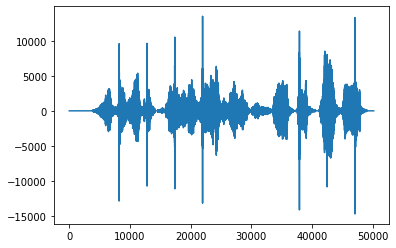

In [ ]:
#to delete the noise in the recording(the one who are under 100 frequences)
"""for i in data2:
    if i < 100:
        i = 0"""

for i in range(len(data2)): 
    if data2[i] < 100 and data2[i] > -100:
        data2[i] = 0

plt.close()
plt.plot(data2)
plt.show()